In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [19]:
mutToFrequency = {} #key is bin, value is frequency of mutated CpG sites in this bin
totalCpGFrequency = {} #key is bin, value is total frequency of CpG sites in this bin

In [20]:
#takes a list of methylation ratios and "bins" them while keeping track of the frequency in each bin.
#ratios of exactly 0 and exactly 1 are separate bins, and the rest are in increments of 0.1 from 0 to 1 for a total of 12 bins
#for example, a bin of 0.25 represents all methylation ratios falling between 0.2 and 0.3
def bin(binToFrequency, ratios):
    for ratio in ratios:
        if ratio == 0: #0
            if 0 not in binToFrequency.keys():
                binToFrequency[0] = 0
            binToFrequency[0] += 1

        elif ratio > 0 and ratio <= 0.1: #0.05
            if 0.05 not in binToFrequency.keys():
                binToFrequency[0.05] = 0
            binToFrequency[0.05] += 1

        elif ratio > 0.1 and ratio <= 0.2: #0.15
            if 0.15 not in binToFrequency.keys():
                binToFrequency[0.15] = 0
            binToFrequency[0.15] += 1

        elif ratio > 0.2 and ratio <= 0.3: #0.25
            if 0.25 not in binToFrequency.keys():
                binToFrequency[0.25] = 0
            binToFrequency[0.25] += 1

        elif ratio > 0.3 and ratio <= 0.4: #0.35
            if 0.35 not in binToFrequency.keys():
                binToFrequency[0.35] = 0
            binToFrequency[0.35] += 1

        elif ratio > 0.4 and ratio <= 0.5: #0.45
            if 0.45 not in binToFrequency.keys():
                binToFrequency[0.45] = 0
            binToFrequency[0.45] += 1

        elif ratio > 0.5 and ratio <= 0.6: #0.55
            if 0.55 not in binToFrequency.keys():
                binToFrequency[0.55] = 0
            binToFrequency[0.55] += 1

        elif ratio > 0.6 and ratio <= 0.7: #0.65
            if 0.65 not in binToFrequency.keys():
                binToFrequency[0.65] = 0
            binToFrequency[0.65] += 1

        elif ratio > 0.7 and ratio <= 0.8: #0.75
            if 0.75 not in binToFrequency.keys():
                binToFrequency[0.75] = 0
            binToFrequency[0.75] += 1

        elif ratio > 0.8 and ratio <= 0.9: #0.85
            if 0.85 not in binToFrequency.keys():
                binToFrequency[0.85] = 0
            binToFrequency[0.85] += 1

        elif ratio > 0.9 and ratio < 1: #0.95
            if 0.95 not in binToFrequency.keys():
                binToFrequency[0.95] = 0
            binToFrequency[0.95] += 1

        else: #ratio == 1
            if 1 not in binToFrequency.keys():
                binToFrequency[1] = 0
            binToFrequency[1] += 1

In [21]:
#Input file 1: bed file containing all CpG's tested and their mean methylation ratio
#Input file 2: bed file containing all CpG sites where mutations occurred
df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/PBCA_cds_average_methylation_expanded.bed', sep='\t')
mut = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/PBCA_cds_average_methylation_mutation_expanded.bed', sep='\t')

means = df['mean']
means2 = mut['mean']

bin(totalCpGFrequency, means)
bin(mutToFrequency, means2)

In [22]:
print (mutToFrequency)

{0.95: 1111, 0.15: 34, 0.65: 141, 0.85: 431, 0.75: 240, 0: 36, 0.55: 103, 0.45: 64, 0.05: 97, 0.35: 31, 0.25: 29}


In [23]:
print (totalCpGFrequency)

{0.95: 718702, 0.85: 339590, 0.65: 105322, 0.75: 169048, 0.05: 293608, 0.45: 54630, 0.15: 47976, 0.25: 42284, 0.35: 45384, 0.55: 72396, 0: 116632, 1: 638}


In [24]:
xs = np.array(list(mutToFrequency.keys()))
ys = np.array([mutToFrequency[x]/totalCpGFrequency[x]*1000 for x in mutToFrequency.keys()]) #frequency of mutations per megabase

In [25]:
print (xs)
print (ys)
print (len(xs))
print (len(ys))

[ 0.95  0.15  0.65  0.85  0.75  0.    0.55  0.45  0.05  0.35  0.25]
[ 1.54584237  0.70868768  1.33875164  1.26917754  1.41971511  0.30866315
  1.42273054  1.17151748  0.33037247  0.68306011  0.68583862]
11
11


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xs,ys)
line = slope*xs + intercept
# plt.plot(xs, ys, 'o')
# plt.plot(xs, ys, 'o', line)

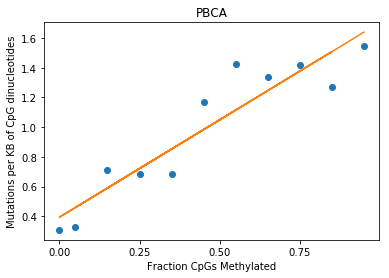

In [27]:
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.plot(xs, ys, 'o', xs, line, '-')
plt.ylabel('Mutations per KB of CpG dinucleotides')
plt.xlabel('Fraction CpGs Methylated')
plt.title('PBCA')

In [28]:
print ("Slope: " slope)
print ("P-value: " p_value)
print ("R-squared: " r_value**2)

3.01357756664e-05


0.868078442013


In [30]:
print (slope)

1.30947832036
